# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
pip install palmerpenguins

In [8]:
# Code Here
import pandas as pd
import numpy as np
from plotnine import *
import palmerpenguins as pp
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *

penguins = pp.load_penguins()
penguins.head()
dummies = pd.get_dummies(penguins) * 1
dummies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
3,NaN,NaN,NaN,NaN,2007,1,0,0,0,0,1,0,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [13]:
# Code Here

#define x and y (predictor and response variables)
x = dummies.drop('bill_depth_mm', axis=1) #keeps all columns but the response
y = dummies['bill_depth_mm']

dummies.dropna(inplace=True)

#test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1031)

#x_train
#y_train
#x_test
#y_test

In [20]:
models = {
    "Model 1": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'], #only numerical predictors
    "Model 2": ['year', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo', ], #year and species predictors
    "Model 3": ['body_mass_g', 'bill_length_mm', 'flipper_length_mm', 'island_Torgersen', 'island_Biscoe', 'island_Dream'], #numerical and island
    "Model 4": ['body_mass_g', 'bill_length_mm', 'flipper_length_mm', 'sex_female', 'sex_male'], #sex and numerical
}

rows = []
for name, Xcols in models.items():
    X = x_train[Xcols]
    model = LinearRegression().fit(X, y_train)
    y_test_ = model.predict(x_test[Xcols])
    x_test[f"{name}_predict"] = y_test_
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_))
    test_r2 = r2_score(y_test, y_test_)
    y_test_ = x_test[f"{name}_predict"]
    mse = mean_squared_error(y_test, y_test_)
    mad = mean_absolute_error(y_test, y_test_)
    rows.append({"Model": name, "Test RMSE": test_rmse, "Test R2": test_r2, "Test MSE": mse, "Test MAD": mad})

test_error = pd.DataFrame(rows)
test_error




,Model,Test RMSE,Test R2,Test MSE,Test MAD
0,Model 1,1.626348,0.395896,2.645006,1.333781
1,Model 2,1.120442,0.713276,1.255390,0.906921
2,Model 3,1.539393,0.458768,2.369729,1.250146
3,Model 4,1.240371,0.648611,1.538521,1.038236


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

model_errors = []
for name, Xcols in models.items():

    # Train error
    X_train_subset = x_train[Xcols]
    model = LinearRegression().fit(X_train_subset, y_train)
    y_train_predict = model.predict(X_train_subset)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    # Test error
    X_test_subset = x_test[Xcols]
    y_test_predict = model.predict(X_test_subset)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

    model_errors.append({"Model": name, "Train RMSE": train_rmse, "Test RMSE": test_rmse})

rmse_comparison = pd.DataFrame(model_errors)
rmse_comparison

,Model,Train RMSE,Test RMSE
0,Model 1,1.523048,1.626348
1,Model 2,1.115152,1.120442
2,Model 3,1.353575,1.539393
3,Model 4,1.129848,1.240371


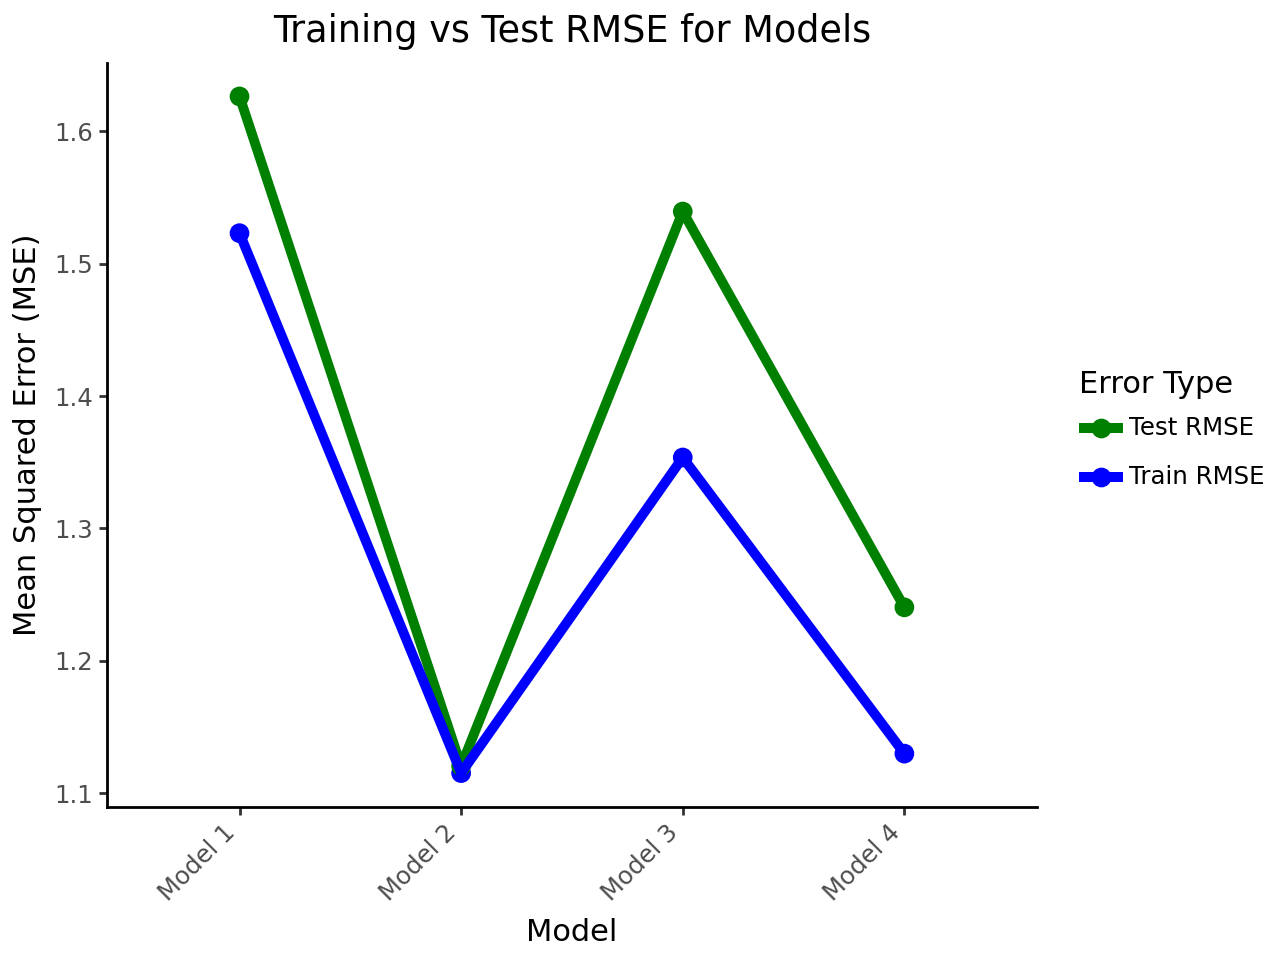

In [30]:
#plot for just one error metric
melt = rmse_comparison.melt(
    id_vars='Model',
    value_vars=['Train RMSE', 'Test RMSE'],
    var_name='Error Metric',
    value_name='RMSE'
)

(   ggplot(melt, aes(x='Model', y='RMSE', color='Error Metric', group='Error Metric'))
    + geom_point(size=3)
    + geom_line(size=2)
    + scale_color_manual(values={'Train RMSE': 'blue', 'Test RMSE': 'green'})
    + labs( title='Training vs Test RMSE for Models',
        x='Model',
        y='Mean Squared Error (MSE)',
        color='Error Type'
    )
    +theme_classic()
    +theme(axis_text_x=element_text(rotation=45, ha='right')
    )
)


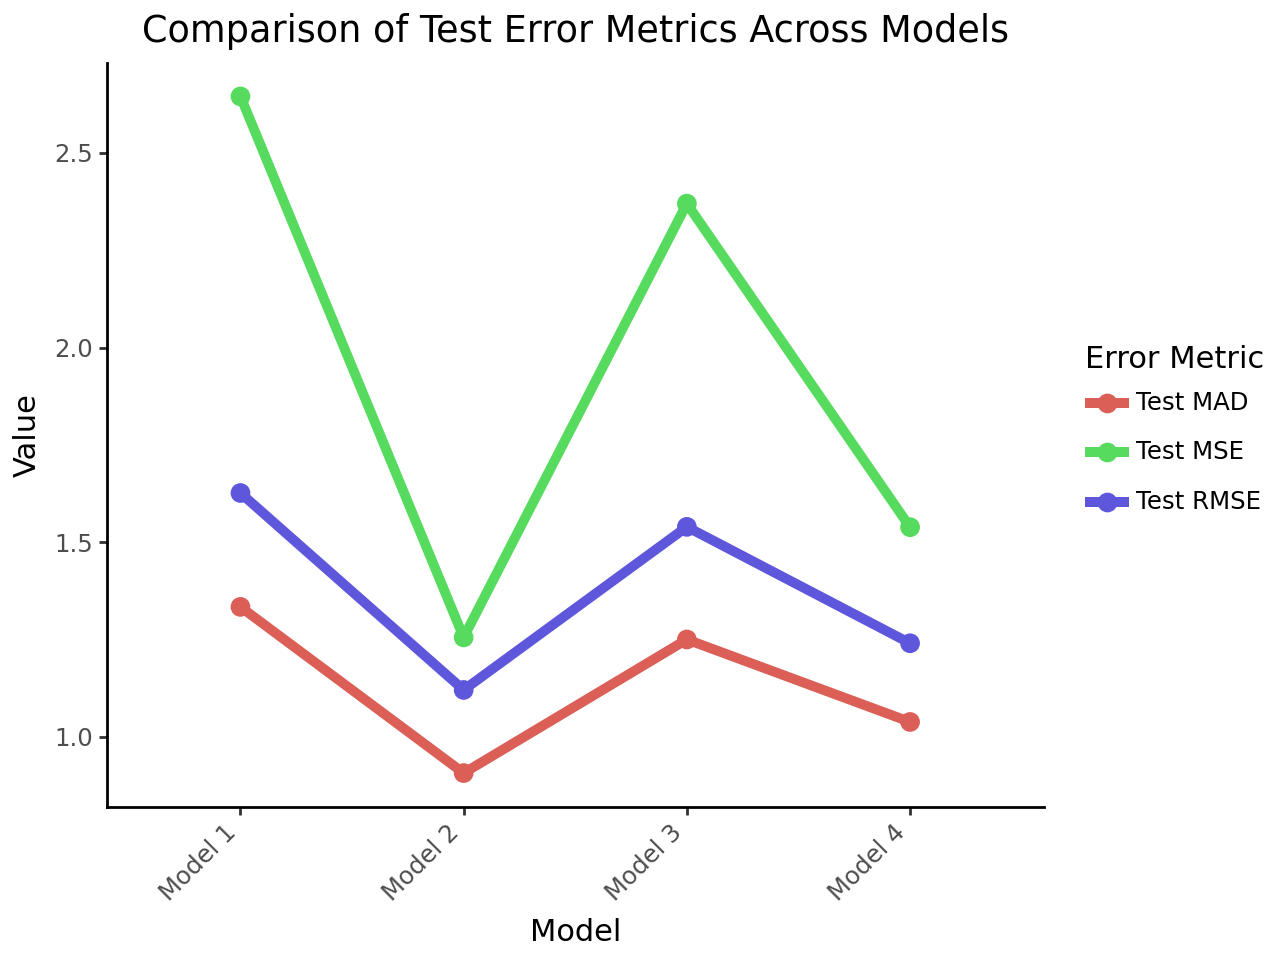

In [31]:
#different version I made with all error metrics instead of just one
melt_all_errors = test_error.melt(
    id_vars='Model',
    value_vars=['Test RMSE', 'Test MSE', 'Test MAD'],
    var_name='Error Metric',
    value_name='Value'
)

(   ggplot(melt_all_errors, aes(x='Model', y='Value', color='Error Metric', group='Error Metric'))
    + geom_point(size=3)
    + geom_line(size=2)
    + labs( title='Comparison of Test Error Metrics Across Models',
        x='Model',
        y='Value',
        color='Error Metric'
    )
    +theme_classic()
    +theme(axis_text_x=element_text(rotation=45, ha='right')
    )
)

Model 2 was definitely my strongest model. It is evident as it has the lowest value for all three major error metrics I used, as well as having the highest R squared value.

"Model 2": ['year', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo', ], #year and species predictors